In [4]:
# !pip install qiskit
# !pip install pylatexenc
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex

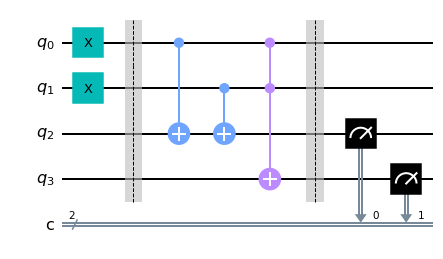

In [17]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw(output = 'mpl')


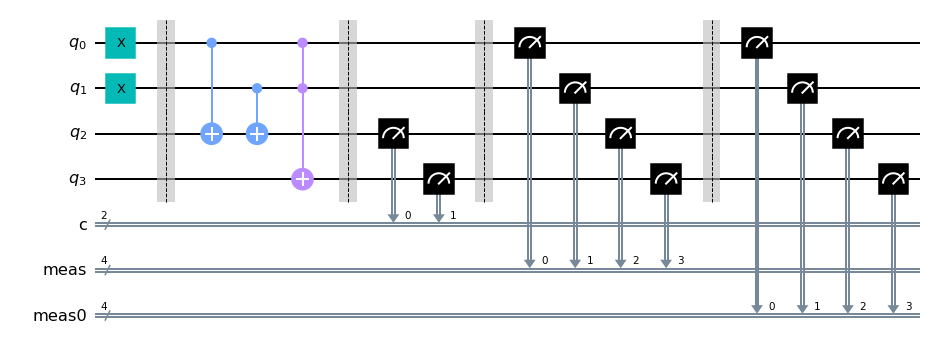

In [20]:
qc_ha.measure_all()
qc_ha.draw(output = 'mpl')

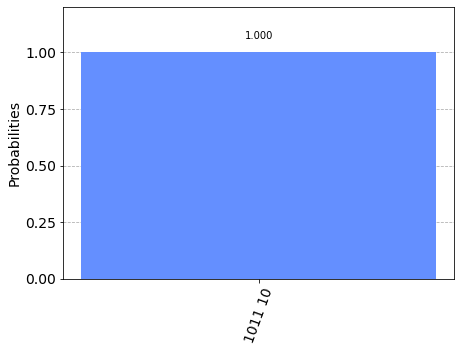

In [19]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(qc_ha)
counts = sim.run(qobj).result().get_counts()
plot_histogram(counts)